In [38]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
data = woo.data('wage1')

In [11]:
data.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,0.355513,0.169202,0.045627,0.114068,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,0.479124,0.375287,0.208874,0.318197,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [31]:
Y = data[['educ','exper','tenure']]
Y = sm.add_constant(Y)

model = sm.OLS(np.log(data['wage']), Y).fit()

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           9.13e-43
Time:                        12:05:57   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.104      2.729      0.0

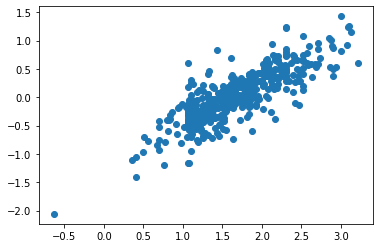

In [36]:
plt.scatter(np.log(data['wage']), model.resid)

In [37]:
data.corr()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
wage,1.000000,0.405903,0.112903,0.346890,-0.038520,-0.340098,0.228817,-0.053760,0.177885,-0.029124,-0.102503,0.087732,0.004034,0.073725,0.055940,-0.189848,-0.141624,0.085204,0.441770,-0.140837,-0.253078,0.937062,0.030238,0.267419
educ,0.405903,1.000000,-0.299542,-0.056173,-0.084654,-0.085029,0.068881,-0.215291,0.224309,0.061372,-0.116625,0.016343,-0.077411,-0.012461,0.107736,-0.059204,-0.072659,0.214198,0.496768,-0.008324,-0.163345,0.431053,-0.331256,-0.069106
exper,0.112903,-0.299542,1.000000,0.499291,0.014356,-0.041626,0.316984,-0.056319,-0.117260,0.010588,0.050323,-0.017398,-0.072841,0.101432,-0.048267,-0.104626,0.041499,-0.020599,-0.005615,-0.040385,-0.071080,0.111373,0.960971,0.422942
tenure,0.346890,-0.056173,0.499291,1.000000,0.011589,-0.197910,0.239889,-0.027037,0.000745,0.014093,-0.025067,-0.021291,-0.025888,0.160519,0.063885,-0.126224,-0.062604,-0.059691,0.090624,-0.072831,-0.112679,0.325538,0.459223,0.921564
nonwhite,-0.038520,-0.084654,0.014356,0.011589,1.000000,-0.010917,-0.062259,0.077701,-0.014147,-0.080201,0.102098,-0.002287,0.046109,0.036261,-0.072328,-0.048486,0.094866,-0.056680,-0.088552,-0.034138,-0.028769,-0.038888,0.009348,-0.007203
female,-0.340098,-0.085029,-0.041626,-0.197910,-0.010917,1.000000,-0.166128,0.033148,0.016545,0.015453,-0.044438,0.054417,-0.082032,-0.092721,-0.018964,-0.053351,0.108833,0.215939,-0.177376,0.355233,0.159226,-0.373677,-0.027860,-0.175623
married,0.228817,0.068881,0.316984,0.239889,-0.062259,-0.166128,1.000000,0.154497,-0.097230,-0.011716,0.075150,-0.022277,0.007452,0.079615,0.038239,-0.136572,-0.054906,0.064603,0.085544,0.025711,-0.157040,0.270669,0.217289,0.166822
numdep,-0.053760,-0.215291,-0.056319,-0.027037,0.077701,0.033148,0.154497,1.000000,-0.096368,-0.089640,0.087655,0.008480,0.014096,0.016017,-0.014791,0.047992,-0.061708,-0.072145,-0.123401,0.028897,0.055361,-0.095297,-0.130906,-0.056640
smsa,0.177885,0.224309,-0.117260,0.000745,-0.014147,0.016545,-0.097230,-0.096368,1.000000,0.055216,-0.231449,0.098553,-0.006885,-0.098107,0.007973,0.017948,0.010028,0.046049,0.145965,0.107216,-0.030039,0.200124,-0.110918,0.004473
northcen,-0.029124,0.061372,0.010588,0.014093,-0.080201,0.015453,-0.011716,-0.089640,0.055216,1.000000,-0.429892,-0.261212,-0.021493,-0.000787,-0.059439,0.020417,-0.062645,0.068810,0.068841,-0.024479,0.043253,-0.015858,0.033540,0.009093


<AxesSubplot:>

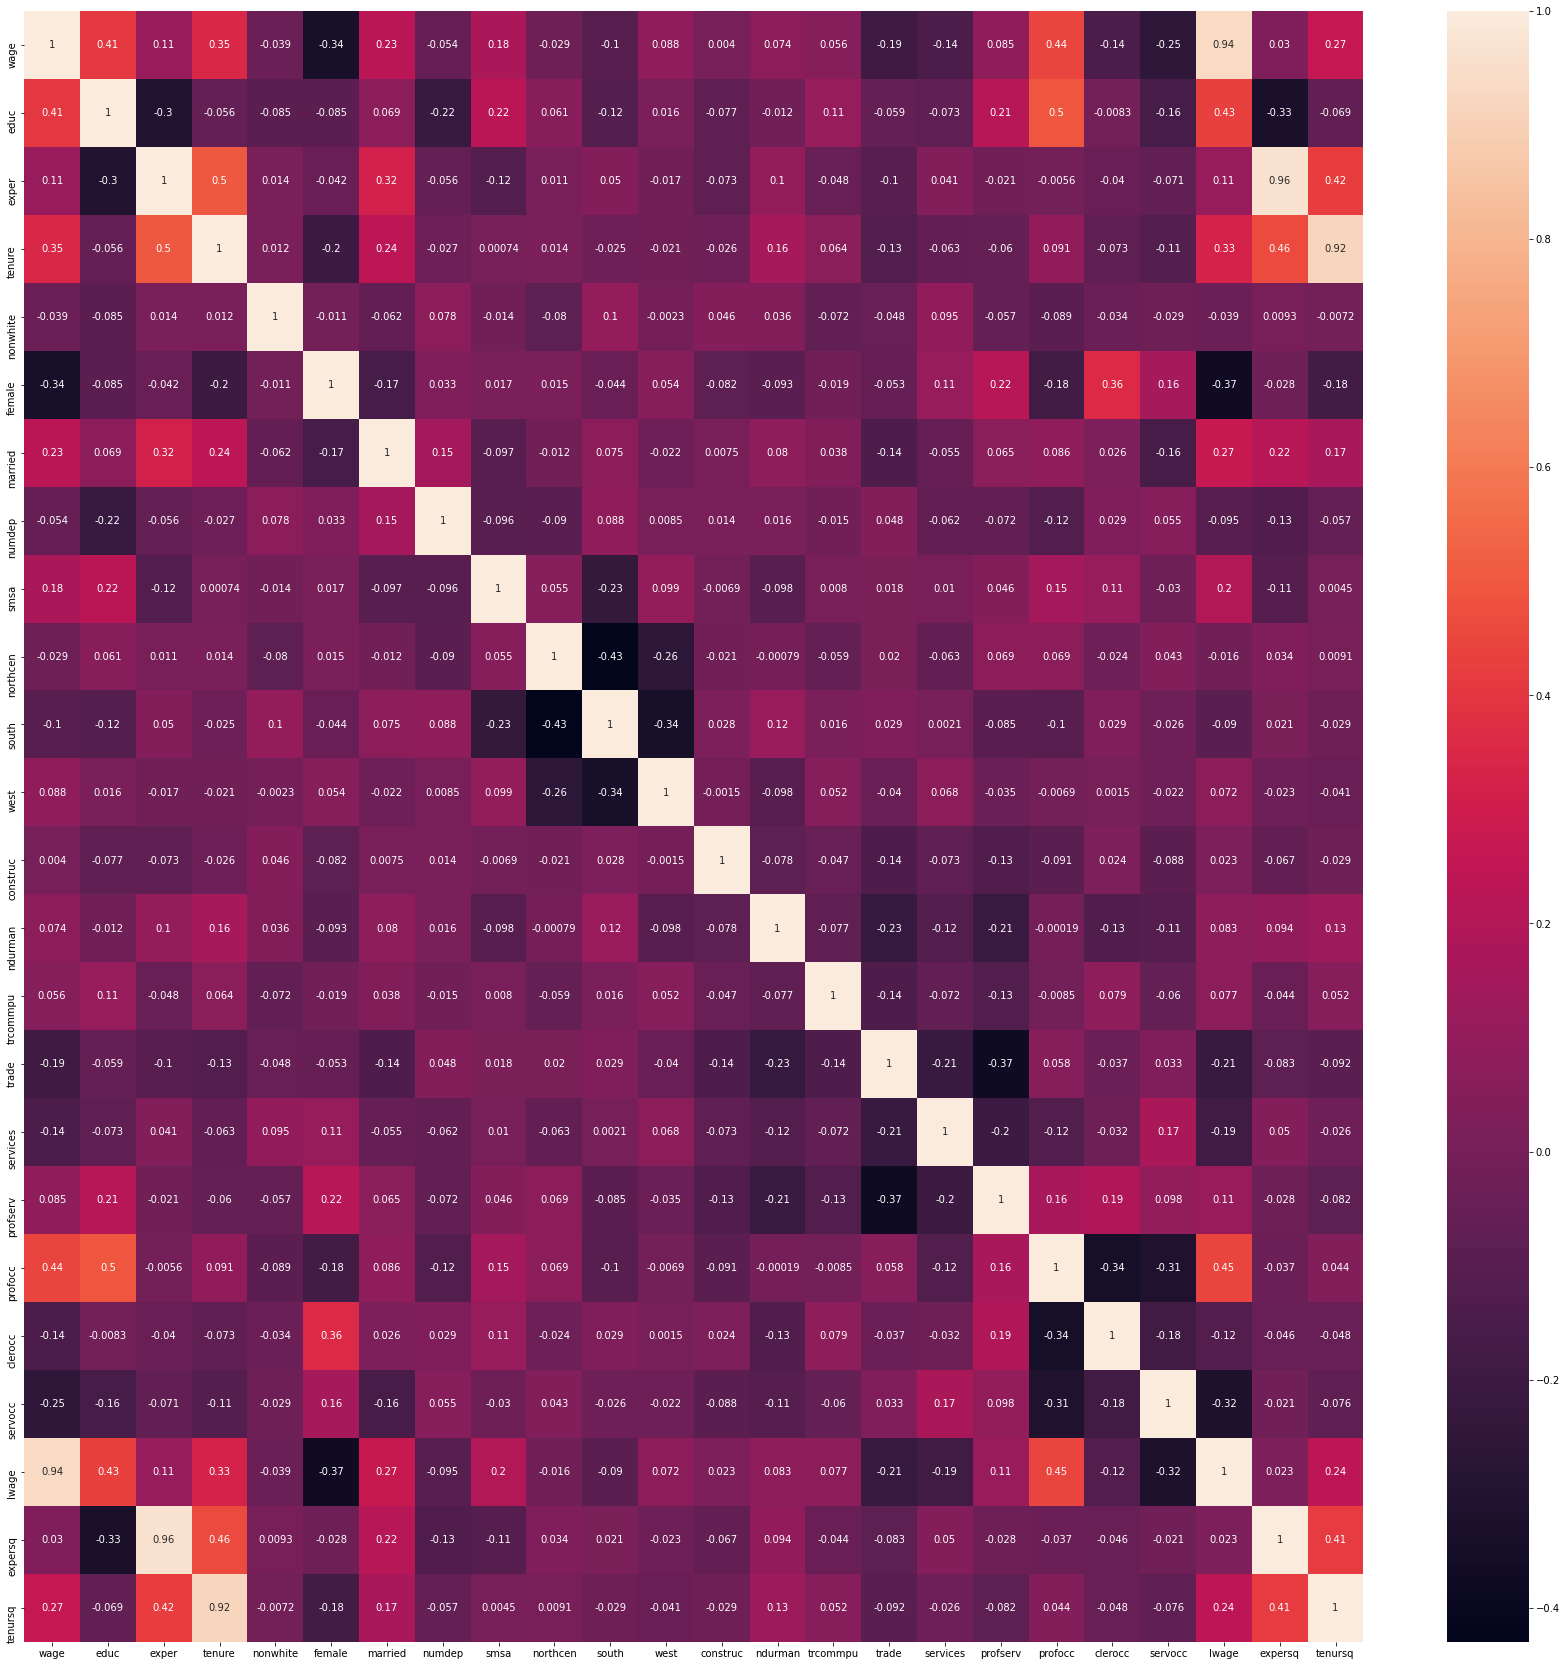

In [43]:
fig, ax = plt.subplots(figsize = (30, 30))
sn.heatmap(data.corr(), annot=True, ax = ax)